In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Read in .csv files
Diboson_data =  pd.read_csv('Diboson.csv')
ggh1000 =  pd.read_csv('ggH1000.csv')
top = pd.read_csv('Top.csv')
zjets = pd.read_csv('Zjets.csv')

In [3]:
# Only keep these labels in the dataframe
keep = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']

# Shorten the Dataset
Diboson_data = Diboson_data[keep]
#print the first 5 rows
Diboson_data.head(5)
# The data looks good!

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,369495.34,9755.2705,345940.12,-0.001591,1.786927,187549.810,374316.600,41920.540,1014320.10,0
1,36972.74,14584.7360,218057.10,-1.066937,2.296220,13106.807,51429.535,225618.530,240295.97,0
2,146895.95,19119.7030,274339.25,0.704825,3.360730,84519.230,153790.270,42284.125,471285.40,0
3,109699.72,8277.4480,444837.44,0.095546,0.702838,76138.640,102611.836,42735.938,495503.10,0
4,151453.40,13848.2230,250422.77,-1.828396,3.634348,86138.000,141886.280,70475.780,498823.40,0


In [4]:
# Shorten the dataset
ggh1000 = ggh1000[keep]
# Print the first 5 rows
ggh1000.head(5)
# The data looks good!

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,320104.62,312638.44,480641.84,-0.851387,0.889354,87475.55,627990.80,44495.770,1063465.80,1
1,288589.78,129548.62,375352.78,1.041311,1.485706,90507.31,409780.94,34441.156,974210.75,1
2,228625.23,118590.28,555879.20,0.417858,1.219367,89765.85,344668.30,21625.379,996837.40,1
3,302502.84,233439.89,430646.20,0.438590,0.592705,92313.63,535629.06,21855.973,989655.56,1
4,224785.02,76205.98,244348.40,1.213717,0.724910,89451.92,296257.47,33677.380,993398.30,1


In [5]:
# Shorten the Dataset
top = top[keep]
# Print the first 5 rows
top.head(5)
# The data looks good!

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,38513.980,9003.888,253407.78,-1.195378,1.435712,35253.492,35612.324,51609.760,245723.92,0
1,34191.734,9425.637,256178.67,0.387434,2.403266,20311.205,38644.793,225038.800,351938.88,0
2,254871.310,17218.764,282584.72,-1.822714,1.336584,134715.500,244261.840,27090.697,1046120.90,0
3,84608.050,9801.820,205555.95,-1.725750,1.780693,69086.836,90045.625,57572.890,301995.70,0
4,50720.953,10932.975,256003.56,1.477704,3.398984,51731.508,52780.684,123177.900,376986.28,0


In [6]:
# Shorten the Dataset
zjets = zjets[keep]
# Print the first 5 rows
zjets.head(5)
# The data looks good!

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,76128.370,11973.011,210397.60,-1.329446,1.895164,95697.766,64252.690,177227.420,596020.44,0
1,40799.945,27624.867,226681.30,-0.429050,0.000000,90289.914,32506.705,10660.757,260357.19,0
2,57988.660,27102.590,547212.70,-0.543789,2.463149,92994.430,55287.625,655334.400,422698.44,0
3,55424.742,51873.030,200684.47,1.776149,2.081222,89607.580,63405.484,41489.973,302718.06,0
4,68312.220,28290.979,324990.97,-1.524169,2.321676,90199.480,47187.332,41731.630,461896.25,0


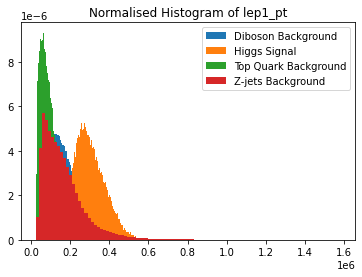

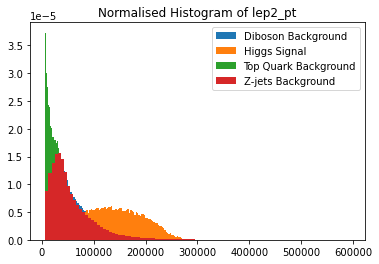

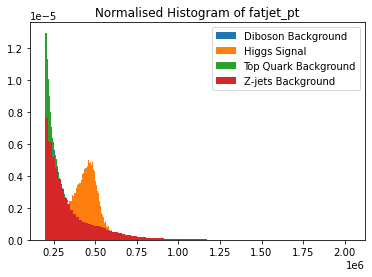

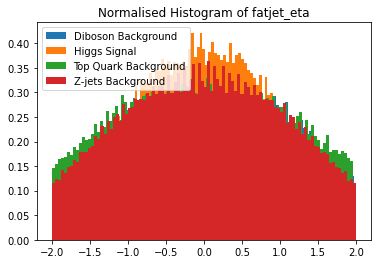

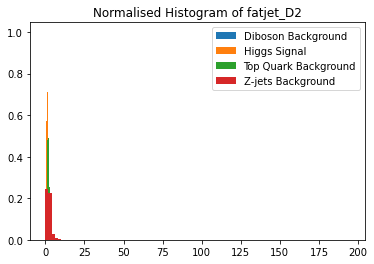

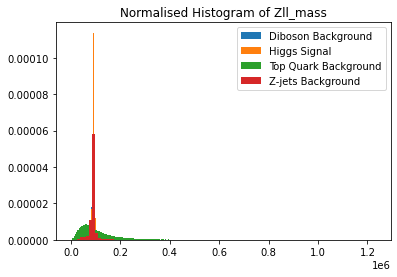

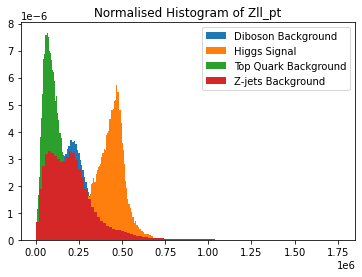

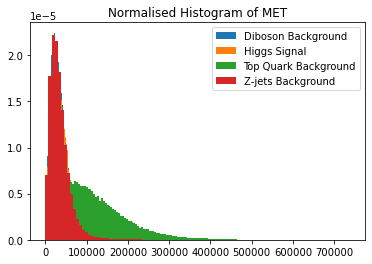

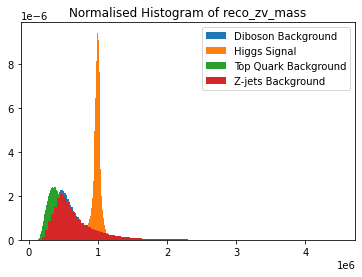

In [7]:
# Plotting the distributions    
for i in range(9):
    #Clean up the data by removing the outliers
    #Remove the largest 500 data points
    D_data=Diboson_data[keep[i]].sort_values()[:-500] 
    G_data=ggh1000[keep[i]].sort_values()[:-500]
    T_data=top[keep[i]].sort_values()[:-500]
    Z_data=zjets[keep[i]].sort_values()[:-500]
    #Plot the normalised histograms with 100 bins
    plt.hist(D_data,density=True,label='Diboson Background',bins=100)
    plt.hist(G_data,density=True,label='Higgs Signal',bins=100)
    plt.hist(T_data,density=True,label='Top Quark Background',bins=100)
    plt.hist(Z_data,density=True,label='Z-jets Background',bins=100)
    plt.title("Normalised Histogram of {}".format(keep[i]))
    plt.legend()
    plt.show()

The histograms show which parameters are useful for separating signal from background. The transverse lepton momenta are useful parameters as the signal is clearly visible away from the background; the transverse momenta of the fatjet is also useful as the signal rises above the tail of the z-jet background; the transverse momentum of the reconstructed dilepton system also towers above the background and the best parameter is the reconstructed invariant mass of the dilepton and fat jet (the bottom plot) which towers significantly above the background and the value $10^6$. Meanwhile, the worst parameters are the $\eta$ value of the fat jet and the missing energy reconstruction 

# Part 2

In [8]:
mega_d = pd.concat([Diboson_data,top,zjets],ignore_index=True) # Concatenate the background dataframes
mega_d = sklearn.utils.shuffle(mega_d,random_state=144) # shuffle them
mega_d = mega_d.reset_index(drop=True) # reset the index 
mega_d # The dataframe looks good!

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,129987.200,129684.125,212218.42,0.059829,4.130715,93298.880,252736.470,30111.9020,525693.80,0
1,275281.200,142238.560,304447.80,-0.054227,2.037450,308534.900,293354.750,8518.9890,737451.56,0
2,73241.086,27316.834,539494.70,0.534243,2.600273,89771.680,48323.970,66358.9800,384654.80,0
3,80157.590,32266.120,351070.94,0.091386,1.362572,102161.780,47891.906,34213.7930,446084.40,0
4,317650.970,22914.078,303283.78,0.414271,2.004709,82843.664,340156.280,2285.5596,678935.60,0
...,...,...,...,...,...,...,...,...,...,...
6826954,234206.360,38218.960,352723.56,0.554933,3.040847,92949.360,269912.220,25515.9260,637996.06,0
6826955,232562.450,8332.054,264437.00,1.351408,2.432621,91500.770,226494.420,11184.7670,507551.47,0
6826956,398864.250,78154.240,618088.00,1.565232,2.509288,231143.380,444340.530,97790.8360,1189955.40,0
6826957,150969.660,110124.250,221963.19,-1.370130,1.805588,96038.480,243111.900,20369.0760,619579.56,0


In [9]:
xtrain = pd.concat([ggh1000,mega_d[:len(ggh1000)]],ignore_index=True) # Add the signal dataframe
xtrain = sklearn.utils.shuffle(xtrain,random_state=144) # shuffle the dataset
xtrain = xtrain.reset_index(drop=True) # reset the index
xtrain # The length is twice that of ggh1000

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,311621.44,166917.380,351686.66,-0.893446,1.296051,97003.766,476325.030,100914.5200,869298.60,1
1,371676.44,56707.793,510651.66,0.360803,1.138071,89759.650,422098.100,32114.2660,944189.10,1
2,183726.81,96609.980,306309.72,-1.528060,1.639424,89656.970,279330.200,9913.6620,951625.30,1
3,395374.40,77077.800,475170.12,0.482761,0.829896,93623.890,472317.160,7209.2800,1012361.75,1
4,113136.06,105196.600,215116.28,-0.665583,2.144964,86765.620,209741.920,22493.1210,537172.56,0
...,...,...,...,...,...,...,...,...,...,...
100021,285666.53,179056.270,494486.70,-0.009768,1.379898,128783.480,457582.780,11007.6875,1031443.00,1
100022,187699.80,9407.155,264273.50,0.996903,2.373407,85700.070,178307.160,15041.1980,511582.38,0
100023,188336.95,57431.520,443256.70,0.008493,2.157738,85286.730,240943.580,49264.6560,1051562.50,0
100024,238174.58,195302.470,492718.78,0.536637,0.347302,85085.290,431991.380,67326.5800,999951.30,1


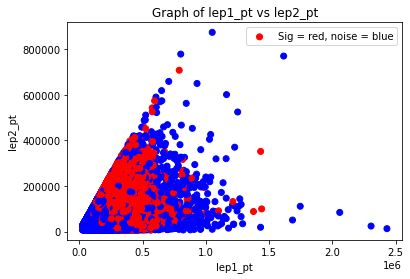

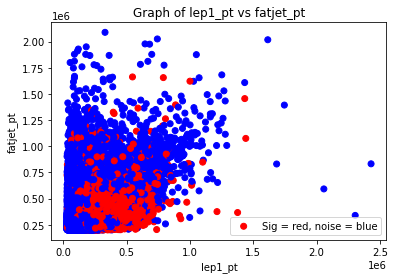

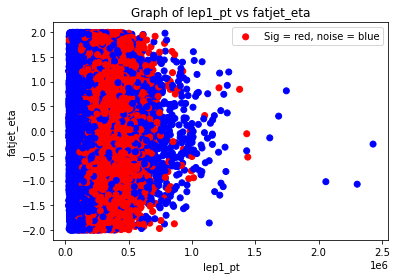

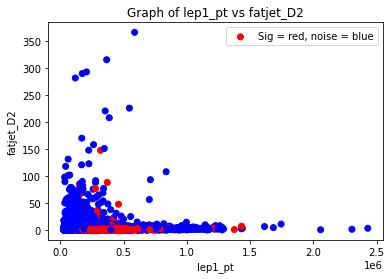

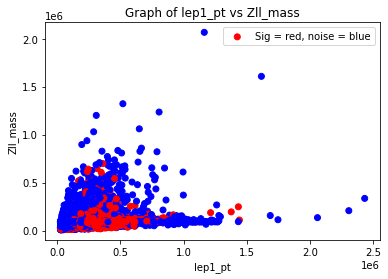

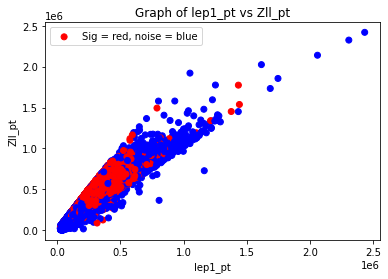

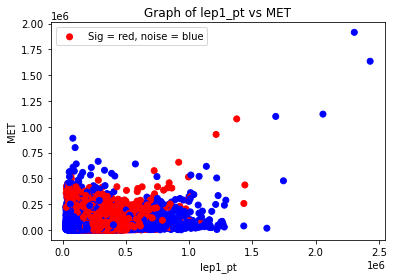

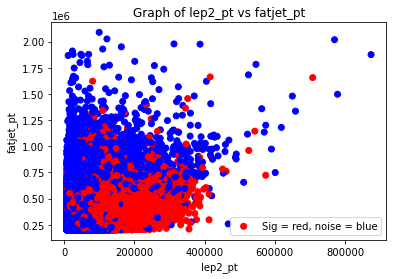

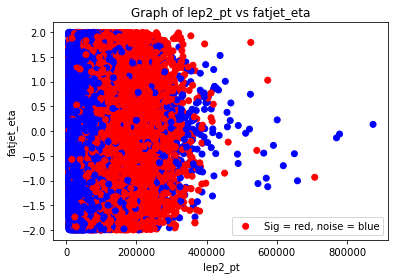

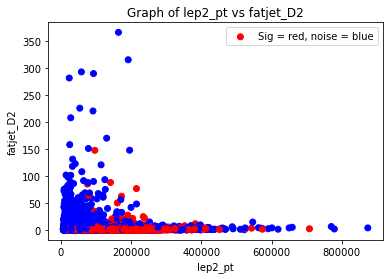

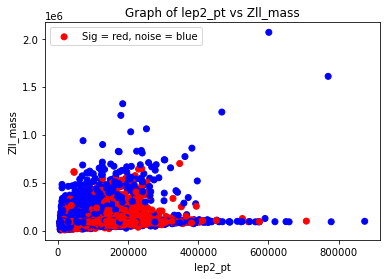

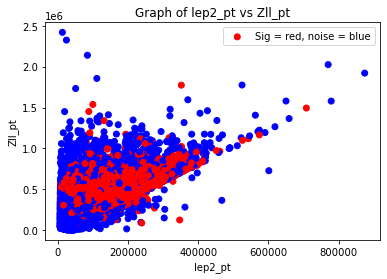

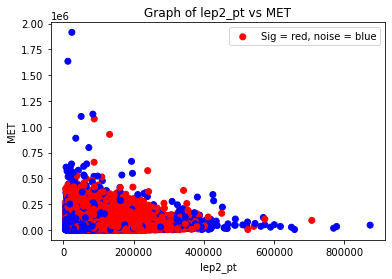

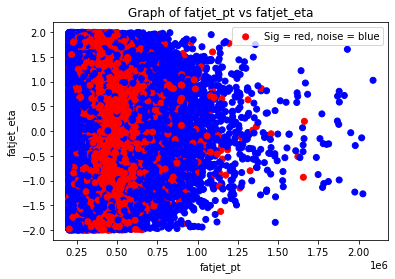

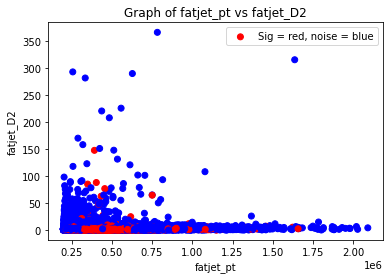

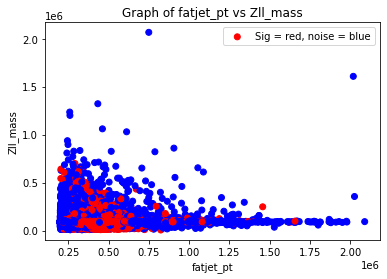

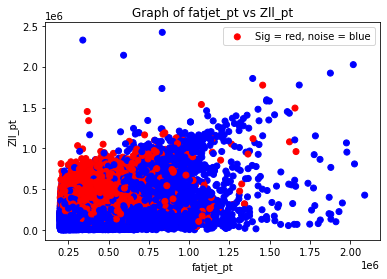

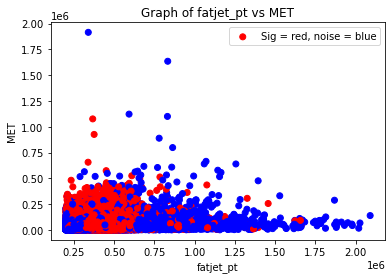

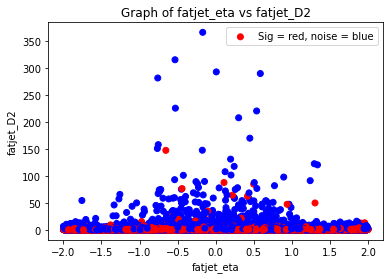

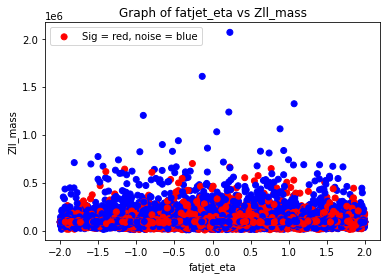

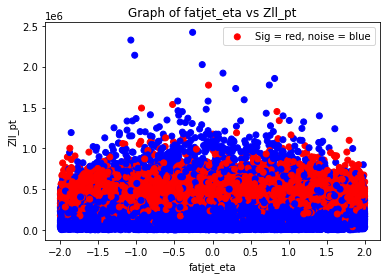

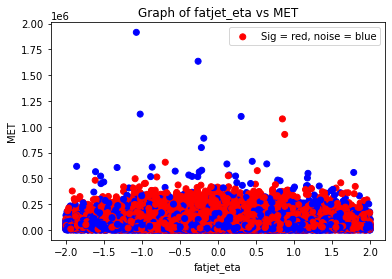

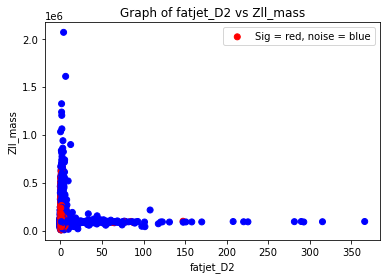

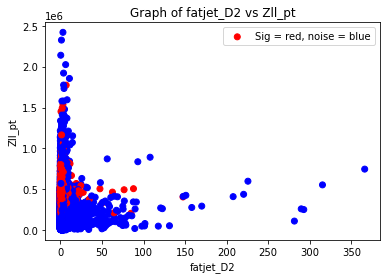

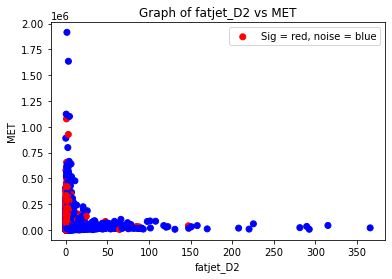

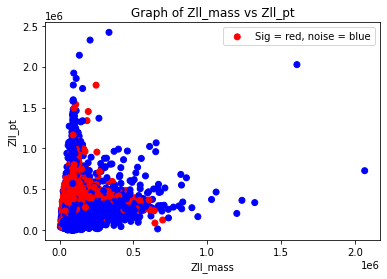

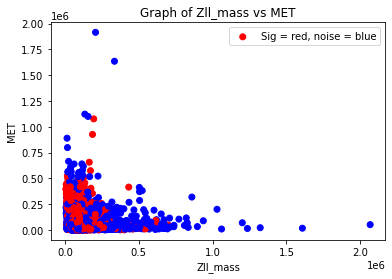

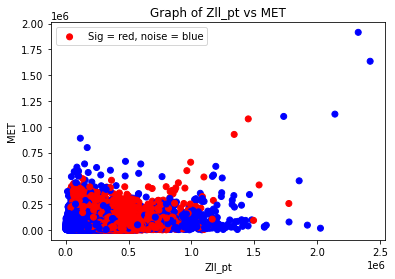

In [10]:
#list of input features (minus reco_zv_mass)
inp_features = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET']
#all features (minus reco_zv_mass)
features = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','isSignal']
#xtrain without the reco_zv_mass
xtrain_noz = xtrain[features]

# Create plots for each variable
for i in range(len(inp_features)):
    for j in range(i+1,len(inp_features)): # Avoid double counting
        col = np.where(xtrain_noz['isSignal']==1,'r','b') # Assign colours
        plt.scatter(xtrain_noz[inp_features[i]],xtrain_noz[inp_features[j]],color=col,label='Sig = red, noise = blue')
        plt.title("Graph of {} vs {}".format(inp_features[i],inp_features[j]))
        plt.xlabel(inp_features[i])
        plt.ylabel(inp_features[j])
        plt.legend()
        plt.show() # signal is red and noise is blue

The plots show that the signal values are reasonably similar to the background values for the majoriy of the plots. Although clusters of signals can be observed in some plots such as in fatjet_eta vs Zll_pt, there is a horizontal band of signal and a cluster in zll_pt vs MET and fatjet_pt vs Zll_pt whereas in fatjet_eta vs Zll_mass does not have much difference between signal and background. Thus, The neural network will be able to sort the values the best using fatjet_eta and Zll_pt as discrimination parameters but it will find things such as Zll_mass a poor parameter to use.

# Exercise 3

In [11]:
from sklearn import model_selection,preprocessing
sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(xtrain_noz[inp_features])
target = xtrain_noz['isSignal']
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
train_data,test_data, train_target,test_target = model_selection.train_test_split(\
input_data,target,test_size =0.3,random_state = Answer_to_all_questions)
print(train_data.shape,train_target.shape,test_data.shape,test_target.shape)
# These shapes look correct

(70018, 8) (70018,) (30008, 8) (30008,)


# Exercise 4

In [12]:
def my_model(num_inputs,num_nodes,extra_depth):
    # create model
    model = Sequential()
    model.add(Dense(num_nodes,input_dim = num_inputs, kernel_initializer = 'normal',\
    activation = 'relu' ))
    model.add(Dropout(0.2))
    for i in range(extra_depth):
        # Add a layer with 100 dimensions
        model.add(Dense(num_nodes,input_dim=100,kernel_initializer = 'normal',activation='relu'))
    
    
    model.add(Dense(num_outputs,activation = 'sigmoid'))
    # Compile model
    model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    return model

In [13]:
# Values as required by the assignment
batchSize=500
N_epochs=50
num_inputs = 8
num_nodes = 20
extra_depth=1
num_outputs=1

model = my_model(num_inputs,num_nodes,extra_depth)

history = model.fit(train_data, train_target, batch_size = batchSize, epochs = N_epochs, \
verbose = 1, validation_data =(test_data, test_target))

2022-03-16 17:57:17.797762: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 17:57:18.348634: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-16 17:57:18.419693: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3292550000 Hz


Epoch 1/50
141/141 [==============================] - 2s 6ms/step - loss: 0.6081 - accuracy: 0.7060 - val_loss: 0.3343 - val_accuracy: 0.8726
Epoch 2/50
141/141 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8707 - val_loss: 0.2917 - val_accuracy: 0.8813
Epoch 3/50
141/141 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8779 - val_loss: 0.2885 - val_accuracy: 0.8835
Epoch 4/50
141/141 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8798 - val_loss: 0.2868 - val_accuracy: 0.8846
Epoch 5/50
141/141 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8803 - val_loss: 0.2850 - val_accuracy: 0.8858
Epoch 6/50
141/141 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.8824 - val_loss: 0.2829 - val_accuracy: 0.8869
Epoch 7/50
141/141 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.8822 - val_loss: 0.2821 - val_accuracy: 0.8859
Epoch 

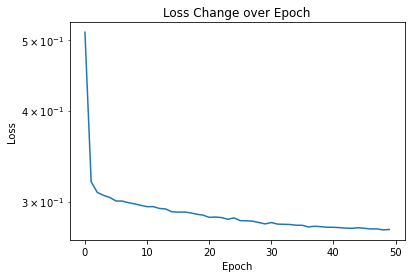

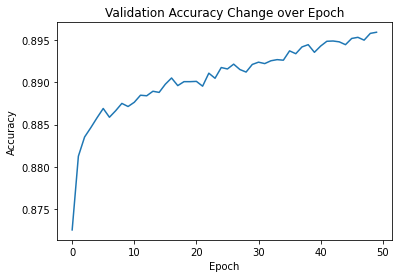

In [14]:
plt.plot(history.history['loss'])
plt.title('Loss Change over Epoch')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy Change over Epoch')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

There is currently no evidence of overtraining as the validation accuracy continues to increase whilst the loss decreases. In fact, the training appears to have stopped too early.

# Exercise 5

In [15]:
# now include the reco_zv_mass
inp_features_2 = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass']

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

input_data = sc.fit_transform(xtrain[inp_features_2]) #redefine the input data
target = xtrain['isSignal']
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
train_data,test_data, train_target,test_target = model_selection.train_test_split(\
input_data,target,test_size =0.3,random_state = Answer_to_all_questions)

#Increase the number of epochs so stopping is determined by the callbacks
# Inrease the depth and the number of nodes to improve model performance
batchSize=500
N_epochs=100
num_inputs = 9
num_nodes = 50
extra_depth=5
num_outputs=1

model2 = my_model(num_inputs,num_nodes,extra_depth) # Redefine the model


callbacks = [
# if we don’t have an increase of the accuracy for 10 epochs, terminate training.
EarlyStopping(verbose = True, patience = 10, monitor = 'val_accuracy'),
# Always make sure that we're saving the model weights with the best accuracy.
ModelCheckpoint('model.h5', monitor = 'val_accuracy', verbose = 0, save_best_only = True, mode = 'max')]
history2 = model2.fit(train_data, train_target, batch_size = batchSize, epochs = N_epochs, \
verbose = 1, validation_data = (test_data, test_target), callbacks = callbacks)

Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.7489 - val_loss: 0.2228 - val_accuracy: 0.9207
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9219 - val_loss: 0.1776 - val_accuracy: 0.9366
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9307 - val_loss: 0.1724 - val_accuracy: 0.9382
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9336 - val_loss: 0.1663 - val_accuracy: 0.9397
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.9357 - val_loss: 0.1628 - val_accuracy: 0.9418
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.9340 - val_loss: 0.1597 - val_accuracy: 0.9431
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1717 - accuracy: 0.9384 - val_loss: 0.1584 - val_accuracy: 0.9434

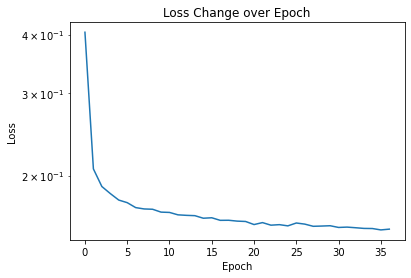

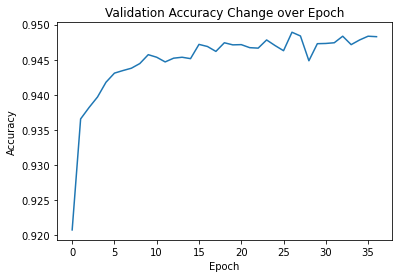

In [17]:
plt.plot(history2.history['loss'])
plt.title('Loss Change over Epoch')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log')
plt.show()

plt.plot(history2.history['val_accuracy'])
plt.title('Validation Accuracy Change over Epoch')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

This accuracy approaches 95% before the early stopping mechanism kicks in and the loss function keeps decreasing so the callbacks work.

# Exercise 6

In [18]:
# use model to predict values
prediction = np.round(model2.predict(test_data),decimals=0) # Round the value to the nearest 0 or 1

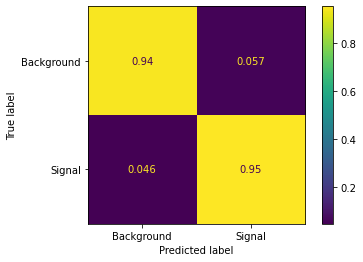

In [19]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Define the confusion matrix and normalise it so that each row/column sums to 1
cmat = confusion_matrix(test_target,prediction,normalize='true')
# Display the matrix and redefine the display labels to show if it's background or signal
cmatplot = ConfusionMatrixDisplay(confusion_matrix=cmat,display_labels=['Background','Signal'])
cmatplot.plot()
plt.show()

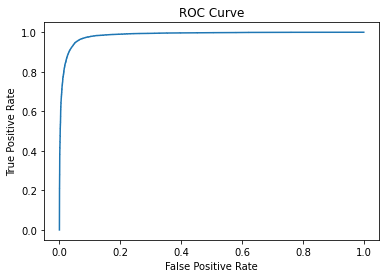

In [20]:
# ROC Curve

from sklearn.metrics import roc_curve

# Create the roc curve
fpr, tpr, thresholds = roc_curve(test_target,model2.predict(test_data))
#plot the ROC curve
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.show()

In [21]:
# Find the best value (the value in the top left corner)
pos = 0
best = 1
for i in range(len(fpr)):
    if(abs(tpr[i]-(1-fpr[i])) < best): # The closer this is to 0, the better it is
        pos = i # Replace position with best one
        best = abs(tpr[i]-(1-fpr[i])) # Replace best value with best one

print("The optimal performance point is at the top left hand side of the ROC curve which,"
      "in this case, is where the true \npositive rate = {:.2f}% and the false positive rate"
      "= {:.2f}%".format(100*tpr[pos],100*fpr[pos]))

The optimal performance point is at the top left hand side of the ROC curve which,in this case, is where the true 
positive rate = 94.80% and the false positive rate= 5.20%
